In [22]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [14]:
df = pd.read_csv('weight-height.csv')
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


Text(0, 0.5, 'Height')

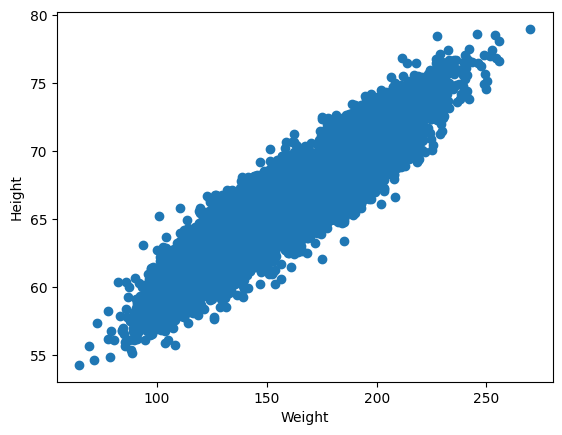

In [15]:
plt.scatter(df['Weight'],df['Height'])
plt.xlabel("Weight")
plt.ylabel("Height")

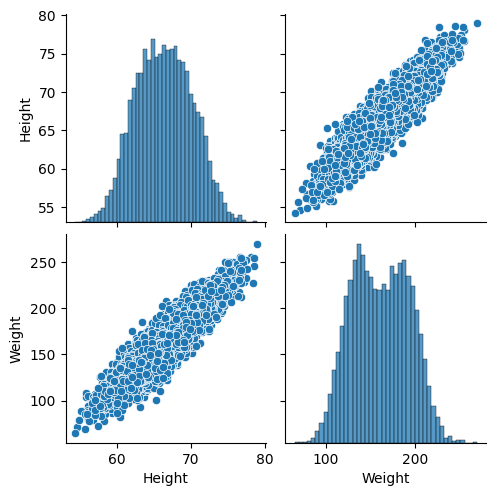

In [23]:
sns.pairplot(df)

In [16]:
df.drop("Gender", axis=1, inplace=True)
df.reset_index(drop=True, inplace=True)

In [17]:
df.isnull().sum()

Height    0
Weight    0
dtype: int64

In [18]:
X = df[['Height']]
y = df['Weight']

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [24]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [27]:
regression = LinearRegression(n_jobs=-1)
regression.fit(X_train, y_train)

LinearRegression(n_jobs=-1)

In [28]:
print("Coefficient or slope:",regression.coef_)
print("Intercept:",regression.intercept_)

Coefficient or slope: [29.66783469]
Intercept: 161.54396403749368


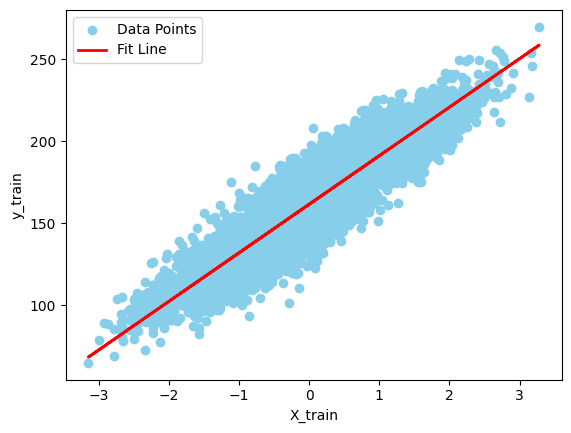

In [30]:
plt.scatter(X_train, y_train, color='skyblue', label='Data Points')
plt.plot(X_train, regression.predict(X_train), color='red', linewidth=2, label='Fit Line')

plt.xlabel('X_train')
plt.ylabel('y_train')
plt.legend()

plt.show()

In [21]:
y_pred = regression.predict(X_test)